# Traitement d'images avec Python 
**scikit-image** (https://scikit-image.org) est une bibliothèque python permettant de réaliser des traitements d'images. Les images chargées correspondent à des tableaux/matrices sur lesquel(les) on peut travailler avec **numpy** et utiliser **matplotlib** pour la visualisation.
**scipy** (https://www.scipy.org) est une bibliothèque python qui rassemble des modules pour l'optimisation, les statistiques, le traitement du signal et des images.

In [45]:
import skimage
import matplotlib.pyplot
import numpy
import scipy

**skimage** contient une base d'images (***data***) https://scikit-image.org/docs/dev/api/skimage.data.html sur lesquelles on peut travailler pour effectuer des tests par exemple.

In [46]:
from skimage import data
camera = data.camera()
retine = data.retina()

## Informations sur les images

In [47]:
type(camera) # type de l'image camera

numpy.ndarray

In [48]:
type(retine) # type de l'image retine

numpy.ndarray

In [49]:
camera.shape #taille de l'image

(512, 512)

In [50]:
retine.shape #taille de l'image

(1411, 1411, 3)

In [51]:
camera.min() #min de l'image

np.uint8(0)

In [52]:
camera.max() #max de l'image

np.uint8(255)

In [53]:
camera.mean() #moyenne de l'image

np.float64(129.06072616577148)

In [54]:
camera[3,52] # valeur du pixel (3,52)

np.uint8(198)

## Visualisation:
https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.imshow.html

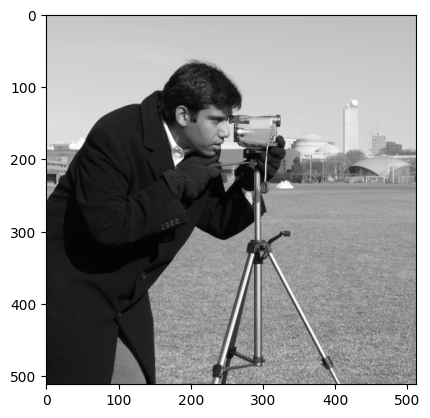

In [55]:
matplotlib.pyplot.imshow(camera, cmap = 'gray')

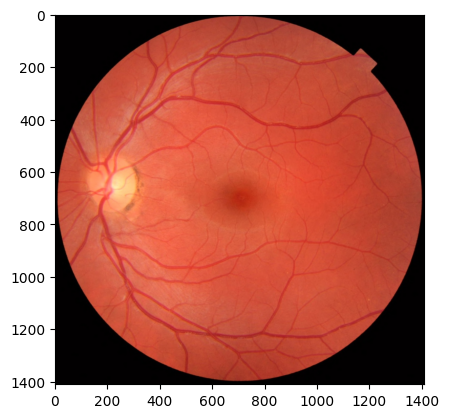

In [56]:
matplotlib.pyplot.imshow(retine)

In [57]:
retine_rouge = retine[:,:,0] #composante rouge
retine_verte = retine[:,:,1] #composante verte
retine_bleue = retine[:,:,2] #composante bleue

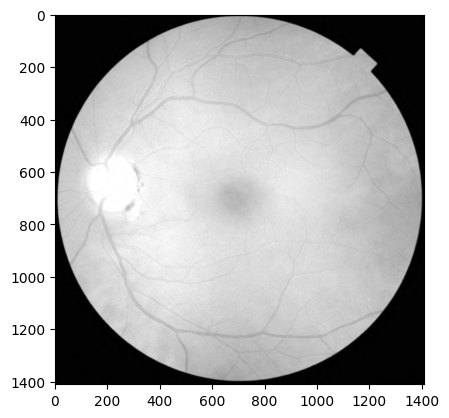

In [58]:
matplotlib.pyplot.imshow(retine_rouge,cmap = "gray") # visualisation de la composante rouge

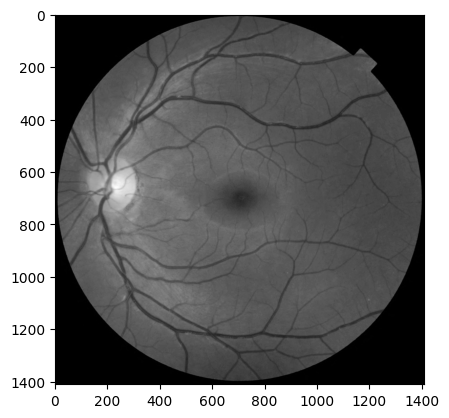

In [59]:
matplotlib.pyplot.imshow(retine_verte,cmap = "gray") # visualisation de la composante verte

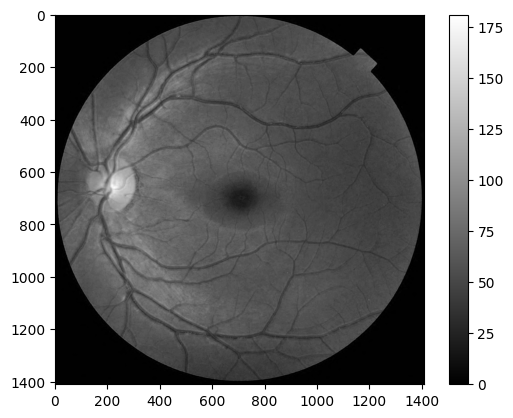

In [60]:
matplotlib.pyplot.imshow(retine_bleue,cmap = "gray") # visualisation de la composante bleu
matplotlib.pyplot.colorbar()

## Opérations sur les images 

### Lecture (et écriture) de l'image  dans divers formats:
https://scikit-image.org/docs/dev/api/skimage.io.html

### Pour les utilisateurs de colab, ne pas oublier de charger l'image avec:

from google.colab import files

uploaded = files.upload()

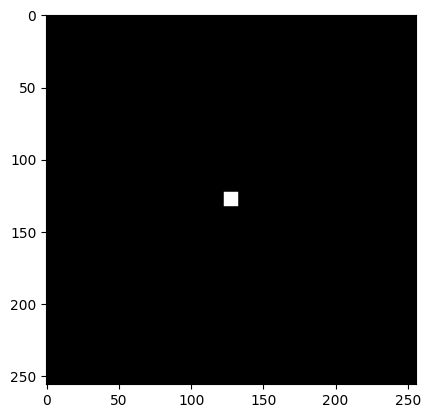

In [61]:
im_carre = skimage.io.imread('carre.png') # lecture de l'image carre.png
matplotlib.pyplot.imshow(im_carre,
                         cmap = 'gray'
                        )                 # visualisation de l'image carre.png

## Filtrage
On réalise dans la suite des opérations de filtrage sur une image. Ce filtrage se fait en convoluant l'image d'origine avec un filtre numérique caractérisé par une matrice.

### Création du filtre moyenneur

In [62]:
moyenneur = numpy.ones((3,3))/9
print(moyenneur.shape) # taille du filtre
moyenneur              # forme du filtre

(3, 3)


array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

### Convolution
La fonction convolve2d est utilisée ppour convoluer deux matrices entre elles:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html

In [63]:
from scipy import signal

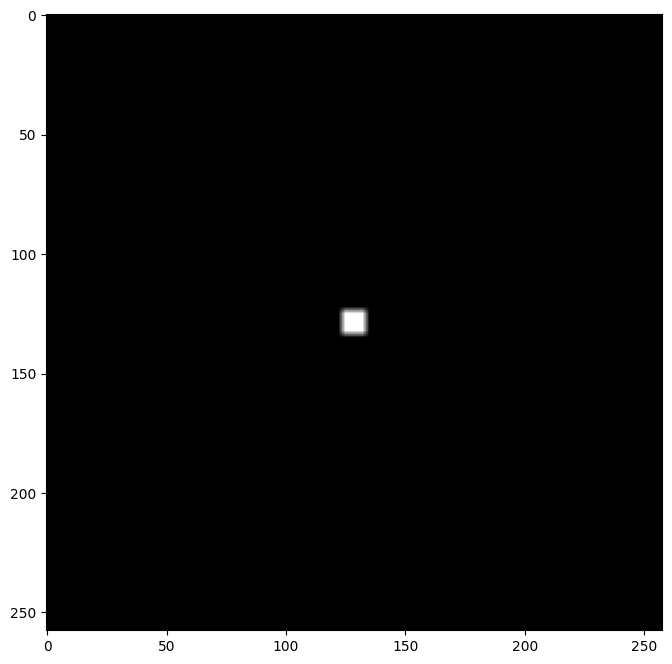

In [64]:
result = signal.convolve2d(im_carre,moyenneur) # convolution de l'image avec le filtre
fig = matplotlib.pyplot.figure(figsize=(8,8))
matplotlib.pyplot.imshow(result,
                         cmap = 'gray'
                    )

Le filtre implémenté ici a pour effet de rendre floue l'image, il supprime donc les détails dans celle-ci, ses contours, donc ses hautes fréquences. Il agit comme un passe-bas.

## Filtres de Sobel
Ces filtres sont des filtres de type passe-haut qui vont couper les basses fréquences et mettre en valeur les hautes. Ils agissent comme des détecteurs de bords suivant les deux directions x et y.

### Implémentation "manuelle"

#### Génération numérique des filtres de Sobel

In [65]:
Sobel_y = numpy.array([
    [-1,-2,-1],
    [0,0,0],
    [1,2,1]
])

Sobel_x= numpy.transpose(Sobel_y)
print(Sobel_y)
print(Sobel_x)

[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]


#### Application des filtres sur une image par convolution

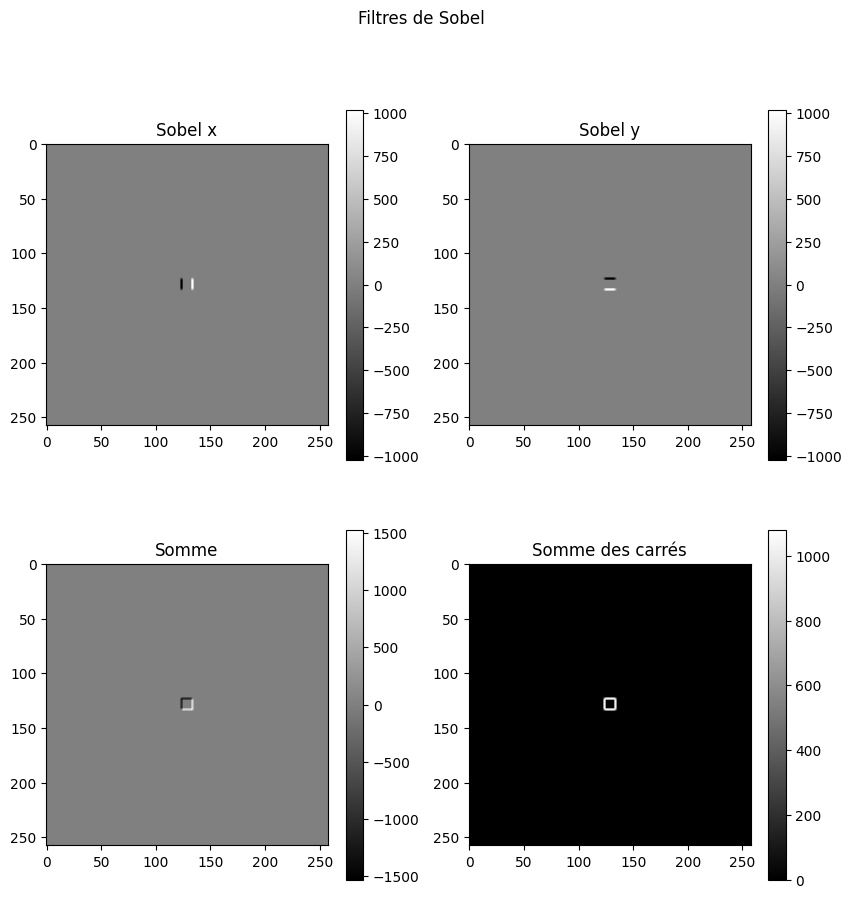

In [66]:
result_x = signal.convolve2d(im_carre,Sobel_x)
result_y = signal.convolve2d(im_carre,Sobel_y)# convolution par un des deux filtres

fig, axs = matplotlib.pyplot.subplots(nrows =2, ncols=2,  figsize=(10, 10))

fig.suptitle("Filtres de Sobel")
axs[0,0].set_title('Sobel x')
im1 = axs[0,0].imshow(result_x,  cmap = 'gray')
fig.colorbar(im1,ax =axs[0,0])



axs[0,1].set_title('Sobel y')
im2 = axs[0,1].imshow(result_y,  cmap = 'gray')
fig.colorbar(im2,ax =axs[0,1])


axs[1,0].set_title('Somme')
im3 = axs[1,0].imshow(result_x + result_y,  cmap = 'gray')
fig.colorbar(im3,ax =axs[1,0])


axs[1,1].set_title('Somme des carrés')
im4 = axs[1,1].imshow(numpy.sqrt(numpy.square(result_x) + numpy.square(result_y)),  cmap = 'gray')
fig.colorbar(im4,ax =axs[1,1])




Les filtres de Sobel sont des filtres dérivatifs qui appliqués sur une image permettent de sélectionner les hautes fréquences qui traduisent les informations sur les contours. Le filtre de Sobel_x détecte les contours verticaux et Sobel_y les contours horizontaux.

### Implémentation via les filtres de skimage
Il est possible d'implémenter ses propres filtres (comme on l'a fait dans les parties précédentes). De nombreux filtres classiques en traitement d'images sont disponibles  dans la librairie skimage.
https://scikit-image.org/docs/dev/api/skimage.filters.html

In [67]:
from skimage import filters

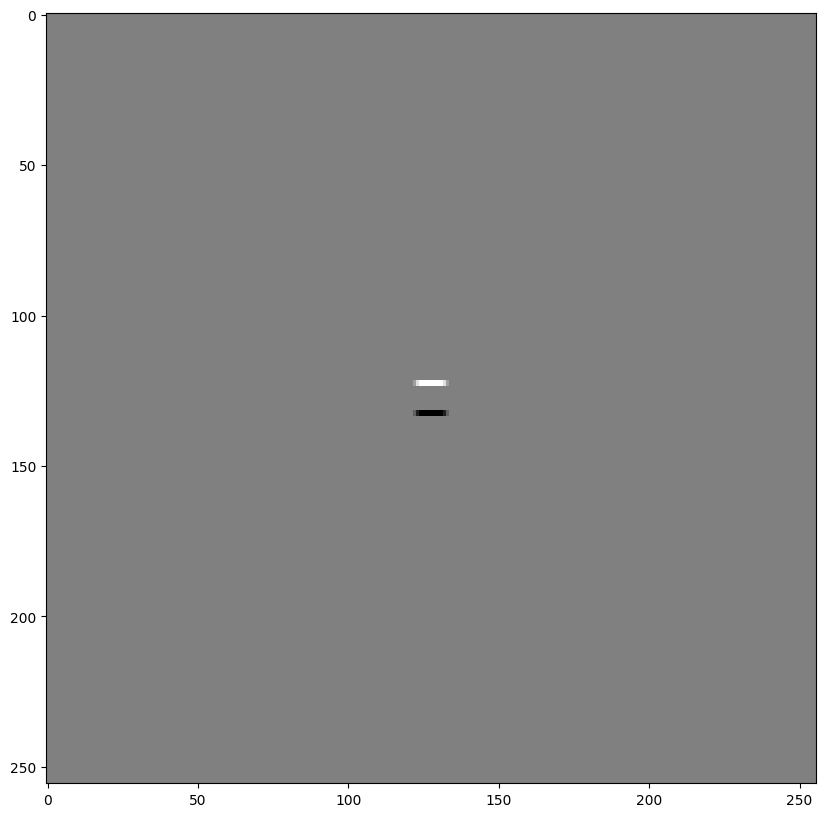

In [68]:
result = filters.sobel_h(im_carre)

fig = matplotlib.pyplot.figure(figsize=(10,10))
matplotlib.pyplot.imshow(result,
                         cmap = 'gray'
                    )

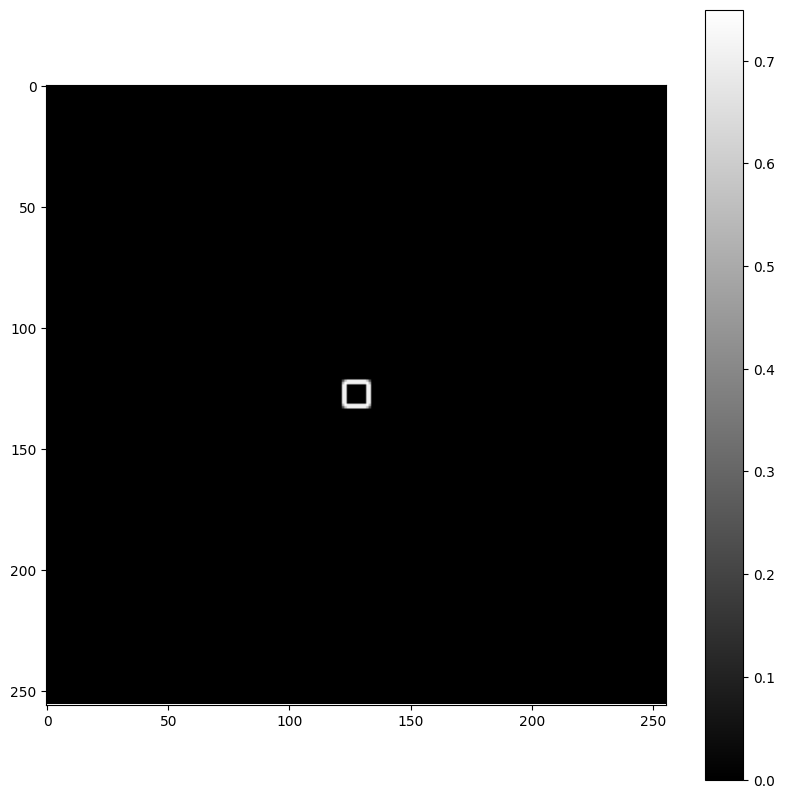

In [69]:
result = filters.sobel(im_carre)

fig = matplotlib.pyplot.figure(figsize=(10,10))
matplotlib.pyplot.imshow(result,
                         cmap = 'gray'
                    )
matplotlib.pyplot.colorbar()

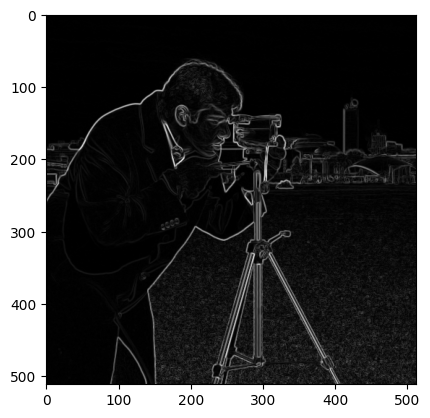

In [70]:
cont = filters.sobel(camera)
matplotlib.pyplot.imshow(cont,cmap = 'gray')

#### Filtres de Prewitt
Il s'agit de filtres dérivateurs (passe-haut) qui calculent la dérivée numérique suivant les deux directions x et y.

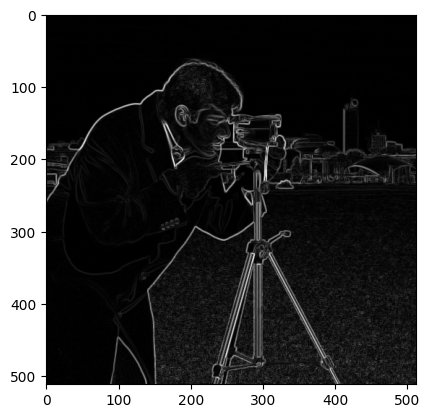

In [71]:
cont = filters.prewitt(camera)
matplotlib.pyplot.imshow(cont,cmap = 'gray')

#### Filtres de Roberts 
Ce sont aussi des filtres de type passe-haut.

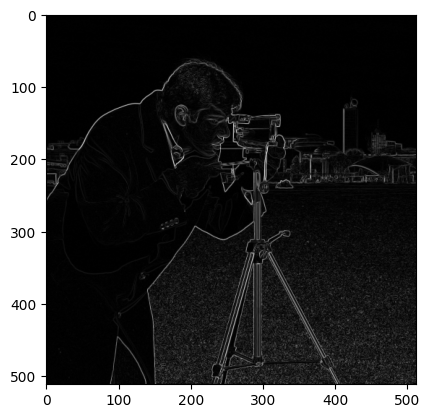

In [72]:
cont = skimage.filters.roberts(camera)
matplotlib.pyplot.imshow(cont,cmap = 'gray')

## Manipulation des images

De nombreuses fonctions existent dans la librairie de skimage 
https://scikit-image.org/docs/dev/api/skimage.util.html

In [73]:
fond_de_ciel = data.hubble_deep_field() # chargement d'une image de skimage

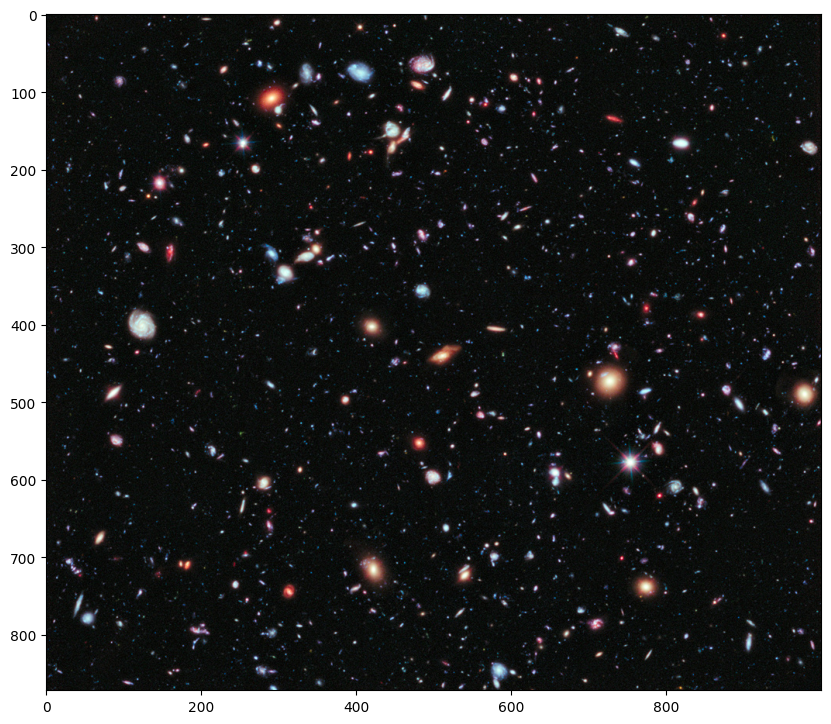

In [74]:
fig = matplotlib.pyplot.figure(figsize=(10,10)) # visualisation
matplotlib.pyplot.imshow(fond_de_ciel)

### Extraction d'une sous-image
La fonction crop  extrait une partie de l'image originale.

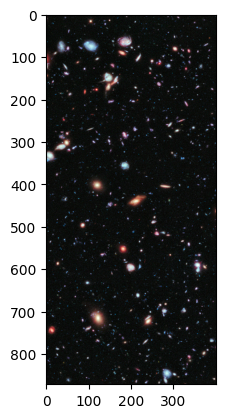

In [75]:
fond_de_ciel_crop = skimage.util.crop(fond_de_ciel, ((0, 0), (300, 300), (0,0)), copy=False)
matplotlib.pyplot.imshow(fond_de_ciel_crop)

In [76]:
print(fond_de_ciel.shape, fond_de_ciel_crop.shape) # affiichage de la taille de l'image

(872, 1000, 3) (872, 400, 3)


#### Autre façon d'extraire une partie de  l'image

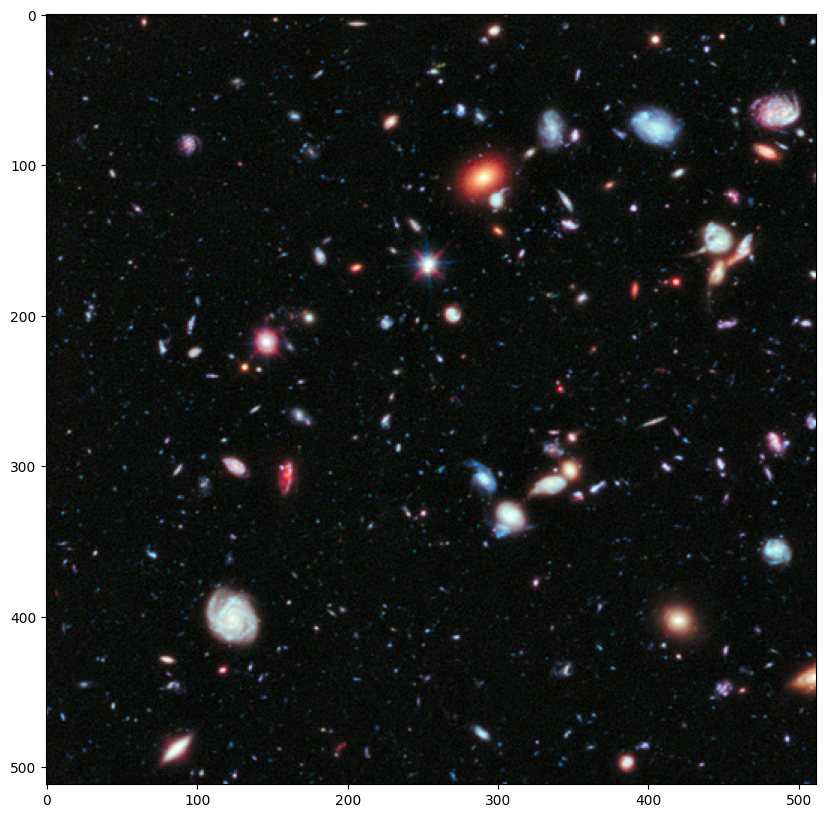

In [77]:
fond_de_ciel_crop = fond_de_ciel[0:512,0:512,:]
fig = matplotlib.pyplot.figure(figsize=(10,10))
matplotlib.pyplot.imshow(fond_de_ciel_crop)

#### Extraction de la composante rouge 

In [78]:
fond_de_ciel_crop_rouge = fond_de_ciel_crop[:,:,0] #composante rouge

# Exercices 
## Détection des galaxies par corrélation
On va chercher à détecter dans une image de fond de ciel, les galaxies présentes. Pour cela, on va supposer qu'une galaxie possède une forme circulaire que l'on pourra modéliser par la fonction psf suivante:

In [79]:
x, y = numpy.meshgrid(numpy.linspace(-1,1,50), numpy.linspace(-1,1,50))
d = numpy.sqrt(x*x+y*y)
sigma, mu = 1.0, 0.0
psf = numpy.exp(-( (d-mu)**2 / ( 2.0 * sigma**2 ) ) )

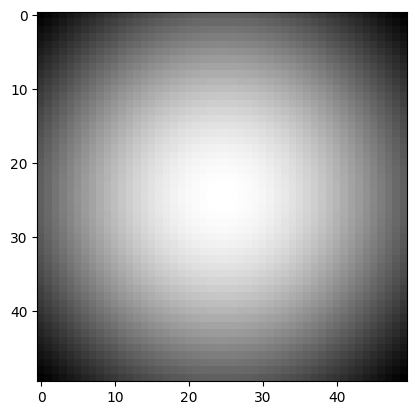

In [80]:
matplotlib.pyplot.imshow(psf, cmap = 'gray')

La détection des galaxies se fera par corrélation. Vous réaliserez la corrélation entre l'image de la psf et de la composante rouge du fond de ciel (**fond_de_ciel_crop_rouge**) et vous représenterez les galaxies détectées.

## Transformée de Fourier
Beaucoup de méthodes de traitement d'images utilisent la transformée de Fourier.
1. Calculez et visualisez la transformée de Fourier de la composante rouge de l'image fond_de_ciel (**fond_de_ciel_crop_rouge**). Commentez.
2. Chargez et visualisez l'image **image_galaxies.npy** (au format numpy) et comparez à l'image  **fond_de_ciel_crop_rouge**. 
3. Calculez et visualisez la transformée de Fourier de l'image **image_galaxies.npy**. Commentez.